In [7]:
import numpy as np
import matplotlib.pyplot as plt

Question A: It is given that the clearence cost $p_s$ is higher than the cost of selling the items at a loss $p_l$. Therefore the (low) price $p_l$ of the item should be less than cost of the item $c$ added to the shipping cost $c_s$ of the item. Therefore we have $p_l < c + c_s$.

Question B: We can derive the expression for $\tilde{c},\tilde{p}$ very quickly by noting:
$$\tilde{c} = c + c_s$$
$$\tilde{p} = \min{\{p,p_L\}}$$

With that we can derive the following profit function:

$$\Pi(Q,Y,c,p,c_s,p_L) = \max{\{0,Q-Y\}} p_L +\min{\{Y,Q\}}p-\max{\{0,Q-Y\}}c_s - Qc$$


Question C: With the result from b we can derive the optimal order quantity $Q^*$ by using the theorem from class:
We know:
$$\text{Critical quantile} = \frac{\text{underage cost}}{\text{underage cost} + \text{overage cost}}$$
We know:
$$\text{underage cost} = \text{cost of lost sale} = p - c $$
$$\text{overage cost} = \text{cost per unsold item} = c + c_s - p_L $$
Therefore the critial quantile is:
$$\text{Critical quantile} = \frac{p - c}{c + c_s - p_L + p - c}$$
$$\text{Critical quantile} = \frac{p - c}{p + c_s - p_L}$$
Therefore we have the optimal order quantity
$$Q^*(F_Y) = F_Y^{-1} \Bigg (\frac{p - c}{p + c_s - p_L} \Bigg)$$


Question D: We will use the following bit of Python code:

8.437529206081708 103.96638382096435 -104.68399894694198 -0.24637297060018584 0.026391982182628042 -0.2727649527828139
8.388257778651473 103.77119415641008 -104.43790888789644 -0.22851620692291325 0.02457777777777776 -0.253093984700691
8.339320123641574 103.57629644985745 -104.19256485256186 -0.21087312621812904 0.022771618625277143 -0.2336447448434062
8.290713423259376 103.38169056926436 -103.94796265637068 -0.19344155099823995 0.020973451327433626 -0.21441500232567356
8.242434889191223 103.18737637317496 -103.70409814887734 -0.17621932829432074 0.01918322295805738 -0.19540255125237813
8.194481762231801 102.99335371091361 -103.46096721339418 -0.15920432933565803 0.01740088105726871 -0.17660521039292673
8.14685131191876 102.7996224227746 -103.21856576663117 -0.1423944492341196 0.01562637362637362 -0.1580208228604932
8.0995408361728 102.60618234020853 -102.97688975834063 -0.1257876066732757 0.01385964912280701 -0.13964725579608273
8.052547660943077 102.41303328600563 -102.7359351709671 

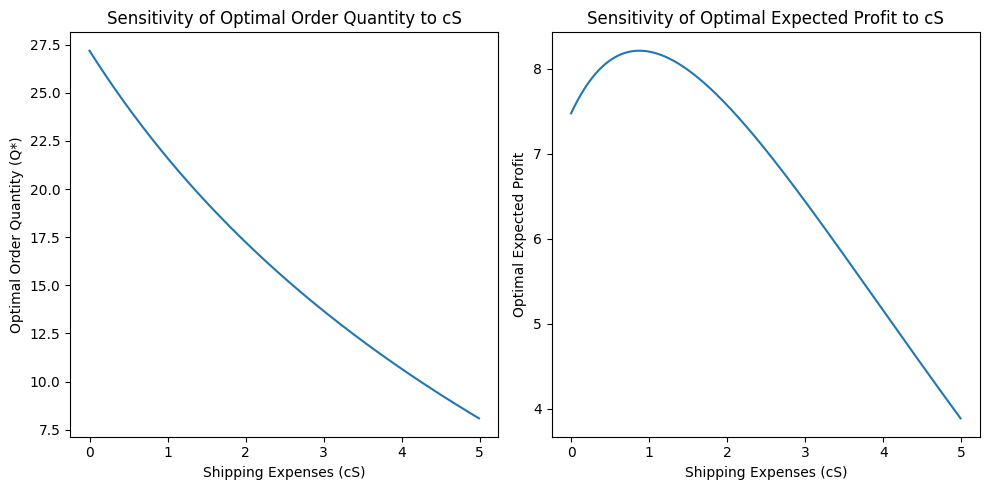

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.integrate import quad

def calculateOptimalOrderQuantity(p,p_L,c,c_s,stdevDemand, meanDemand):
    overage_cost = p - c
    underage_cost = c + c_s - p_L
    quantile = overage_cost / ( overage_cost + underage_cost)
    optimalQuantity = sts.norm.ppf(quantile, loc=meanDemand, scale=stdevDemand)
    return optimalQuantity

#def calculateOptimalProfit(p,p_L,c,c_s,Q_star, meanDemand):
#    s = Q_star - meanDemand
#    profit = -Q_star * c - max(0,s) * c_s + min(Q_star, meanDemand) * p + max(0,s) * p_L
#    return profit

def int_dist(y,dist):
    f = dist.pdf(y)
    return y * f

def calculateOptimalProfit(p,p_L,c,c_s,Q_star, meanDemand, stdevDemand):
    dist = sts.norm(loc=meanDemand,scale=stdevDemand)
    integral_value = quad(int_dist,0,Q_star,args=(dist,))[0]
    t1 = p * integral_value
    t2 = p * Q_star * dist.sf(Q_star)
    t3 = c * Q_star
    t4 = (dist.cdf(Q_star))*(p_L - c_s) - integral_value*(p_L - c_s)
    #print(t1,t2,-t3,t4, dist.cdf(Q_star)*(p_L - c_s),  - integral_value*(p_L - c_s))
    return t1 + t2 - t3 + t4

stdevDemand = 42.255709
meanDemand = 66.527485

cost = 3.85
price = 4.64
priceLow = 0.15
shippingCost = 0.11

optimalOrderQuantity = calculateOptimalOrderQuantity(price,priceLow,cost,shippingCost,stdevDemand,meanDemand)
# Optimal order quantity vs shipping expenses
cS_values = np.arange(0, 5, 0.01)  # Adjust the range as needed

# Lists to store the results
optimal_quantity = []
optimal_profit = []

# Calculate Q* and optimal profit for each cS value
for cS in cS_values:
    Q_star = calculateOptimalOrderQuantity(price, priceLow, cost, cS, stdevDemand, meanDemand)
    optimal_quantity.append(Q_star)
    profit = calculateOptimalProfit(price, priceLow, cost, cS, Q_star, meanDemand, stdevDemand)
    optimal_profit.append(profit)

# Plotting the sensitivity graphs
plt.figure(figsize=(10, 5))

# Sensitivity graph for Q*
plt.subplot(1, 2, 1)
plt.plot(cS_values, optimal_quantity)
plt.xlabel('Shipping Expenses (cS)')
plt.ylabel('Optimal Order Quantity (Q*)')
plt.title('Sensitivity of Optimal Order Quantity to cS')

# Sensitivity graph for optimal profit
plt.subplot(1, 2, 2)
plt.plot(cS_values, optimal_profit)
plt.xlabel('Shipping Expenses (cS)')
plt.ylabel('Optimal Expected Profit')
plt.title('Sensitivity of Optimal Expected Profit to cS')

# Display the plots
plt.tight_layout()
plt.show()
